## 1. Business Understanding
### 1.0 Overview
#### SyriaTel, a telecommunications company, is facing a challenge with customer churn, where customers stop using their services and switch to other providers. This issue results in revenue loss and higher costs for acquiring new customers. To address this, we aim to build a predictive model that can identify if a customer is likely to churn soon. By understanding the patterns and reasons behind customer churn, SyriaTel can take proactive steps to keep their customers happy and loyal. This will help reduce revenue loss and improve overall customer satisfaction.

### 1.1 Dataset choice
#### I chose the SyriaTel dataset for this project because it offers a comprehensive set of features that are critical for understanding customer behavior in the telecommunications industry. The dataset includes detailed information on customer demographics, service usage patterns, and account information, making it well-suited for building a classification model to predict customer churn. Addressing churn is a significant business problem for telecom companies, as retaining customers is more cost-effective than acquiring new ones. By analyzing this dataset, we can identify key factors that influence churn, enabling the development of targeted strategies to improve customer retention and reduce revenue loss.

### 1.2 Problem Statement
#### SyriaTel is facing a significant business challenge due to customer churn, which leads to substantial revenue loss and increased costs for acquiring new customers. Customer churn not only affects the company's bottom line but also disrupts the customer base, making it harder to build long-term customer relationships. High churn rates can indicate underlying issues such as customer dissatisfaction with services, better offers from competitors, or changing customer needs.

### 1.3 Proposed solution
#### We propose using machine learning techniques to create a model that predicts customer churn. Our goal is to achieve an accuracy of 80%. The primary metric to evaluate our model will be the accuracy score, which tells us the percentage of correct predictions. By implementing this churn prediction model, SyriaTel can identify customers who are at risk of leaving and take steps to retain them. This proactive approach will help reduce churn rates, enhance customer satisfaction, and increase overall profitability for the company. SyriaTel can maintain a loyal customer base, reduce the costs associated with acquiring new customers, and achieve sustainable business growth. 

### 1.4 Objectives
##### To Gather Data: Collect and preprocess relevant customer data to ensure it is clean, complete, and ready for analysis.
##### To Engineer Features: Identify and create features that influence customer churn by analyzing customer behavior, service usage, and interaction with customer service.
##### To Build Models: Train various machine learning models to predict customer churn and test different algorithms to find the best-performing model.
##### To Evaluate Models: Assess the models using metrics such as accuracy, precision, recall, and F1 score to select a model that meets the 80% accuracy target.
##### To Implement the Solution: Integrate the best-performing model into SyriaTel's business processes to identify at-risk customers and take timely retention actions.
##### To Monitor and Improve: Continuously monitor the model's performance and update it as needed to ensure ongoing accuracy and relevance.


## 2. Data Understanding
### 2.0 Sources 
#### The dataset used for this project was downloaded from Kaggle, a well-known platform for data science and machine learning datasets. The dataset contains various attributes related to customer demographics, account information, and usage patterns. It was downloaded as a CSV file from Kaggle, and then extracted and prepared for analysis. This dataset is comprehensive and relevant for understanding customer behavior and predicting churn.

### 2.1 Understanding columns
#### state: The state in which the customer resides.
#### account length: The duration (in days) of the customer's account.
#### area code: The area code of the customer's phone number.
#### phone number: The customer's phone number.
#### international plan: Whether the customer has an international plan (yes/no).
#### voice mail plan: Whether the customer has a voice mail plan (yes/no).
#### number vmail messages: The number of voice mail messages the customer has.
#### total day minutes: The total minutes of calls during the day.
#### total day calls: The total number of calls made during the day.
#### total day charge: The total charges for calls made during the day.
#### total eve minutes: The total minutes of calls during the evening.
#### total eve calls: The total number of calls made during the evening.
#### total eve charge: The total charges for calls made during the evening.
#### total night minutes: The total minutes of calls during the night.
#### total night calls: The total number of calls made during the night.
##### total night charge: The total charges for calls made during the night.
#### total intl minutes: The total minutes of international calls.
#### total intl calls: The total number of international calls.
#### total intl charge: The total charges for international calls.
#### customer service calls: The number of calls the customer made to customer service.
#### churn: Whether the customer churned (true/false).



## 3. Data Preparation and Cleaning
### 3.0 Importing the necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 3.1 Creating the class and methods for data preparation.

In [5]:

class SyriaTelChurnAnalysis:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = pd.read_csv(file_path)
    
    def load_dataset(self):
        return self.df

    def display_info(self):
        print("Dataset Info:")
        print(self.df.info())
        print("\n")

    def display_description(self):
        print("Dataset Description:")
        print(self.df.describe())
        print("\n")

    def display_shape(self):
        print(f"Dataset Shape: {self.df.shape}")
        print("\n")

    def check_missing_values(self):
        print("\nMissing Values:")
        print(self.df.isnull().sum())
    
    def check_duplicates(self):
        print("\nDuplicate Values:")
        print(self.df.duplicated().sum())
    
    def detect_outliers(self):
        plt.figure(figsize=(12, 7))
        self.df.boxplot(rot=90)
        plt.show()

    def remove_outliers(self):
        Q1 = self.df.quantile(0.25)
        Q3 = self.df.quantile(0.75)
        IQR = Q3 - Q1
        self.df = self.df[~((self.df < (Q1 - 1.5 * IQR)) | (self.df > (Q3 + 1.5 * IQR))).any(axis=1)]
        print("\nDataset Shape after Removing Outliers:", self.df.shape)

    def cap_outliers(self):
        for col in self.df.select_dtypes(include=[np.number]).columns:
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            self.df[col] = np.where(self.df[col] < lower_bound, lower_bound, self.df[col])
            self.df[col] = np.where(self.df[col] > upper_bound, upper_bound, self.df[col])
        print("\nDataset Shape after Capping Outliers:", self.df.shape)

    
    def final_dataset_info(self):
        print("\nFinal Dataset Info:")
        self.df.info()


### 3.2 Loading and displaying the dataset

In [6]:
file_path = "/home/celine/Moringa/Dsc/phase3/churn_analysis/data_analysis/bigml_59c28831336c6604c800002a.csv"

# Creating an instance of the class and initializing it with the file path
analysis = SyriaTelChurnAnalysis(file_path)

# Loading the dataset
df = analysis.load_dataset()

# Displaying the first 5 rows of the dataset
print(df.head())

  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...           

### 3.3 Displaying basic information about the dataset


In [7]:
# Checking the dataset shape
analysis.display_shape()

Dataset Shape: (3333, 21)




In [8]:
# Displaying the dataset information
analysis.display_info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       33

In [9]:
#displaying the dataset description
analysis.display_description()

Dataset Description:
       account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.06

#### a) Dataset shape
##### 3333: This indicates the dataset contains 3,333 rows. Each row represents a single customer's record.
#### 21: This indicates the dataset contains 21 columns. Each column represents a different attribute or feature of the customers' records.

#### b) Dataset info
##### RangeIndex: The index range is from 0 to 3332, which aligns with the number of rows.
##### Data columns: There are 21 columns in total, each with a specific name and data type.
##### Non-Null Count: All columns have 3,333 non-null entries, meaning there are no missing values in this dataset.
##### Dtype: This specifies the data type of each column. For example: object, integer, float.

#### c) Dataset description
##### count: The number of non-null entries for each column. Here, it's 3,333 for all columns, indicating no missing values.
##### mean: The average value of each column. For example, the average account length is 101.06 days, and the average total day minutes is 179.78 minutes.
##### std: The standard deviation, which measures the spread of the values around the mean. For example, the account length standard deviation is 39.82 days.
##### min: The minimum value in each column. For example, the minimum account length is 1 day, and the minimum number vmail messages is 0.
##### 25% (1st quartile): 25% of the data falls below this value. For example, 25% of customers have an account length of 74 days or less.
##### 50% (median): 50% of the data falls below this value. For example, 50% of customers have an account length of 101 days or less.
##### 75% (3rd quartile): 75% of the data falls below this value. For example, 75% of customers have an account length of 127 days or less.
##### max: The maximum value in each column. For example, the maximum account length is 243 days.


### 3.4 Checking for missing values

In [10]:
analysis.check_missing_values()


Missing Values:
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


##### Observation
#####  There are no null or missing values present in any of the columns of the dataset. Each column has a count of 0 missing values

### 3.5 Checking duplicate values

In [11]:
analysis.check_duplicates()


Duplicate Values:
0


### 3.6 Detecting Outliers

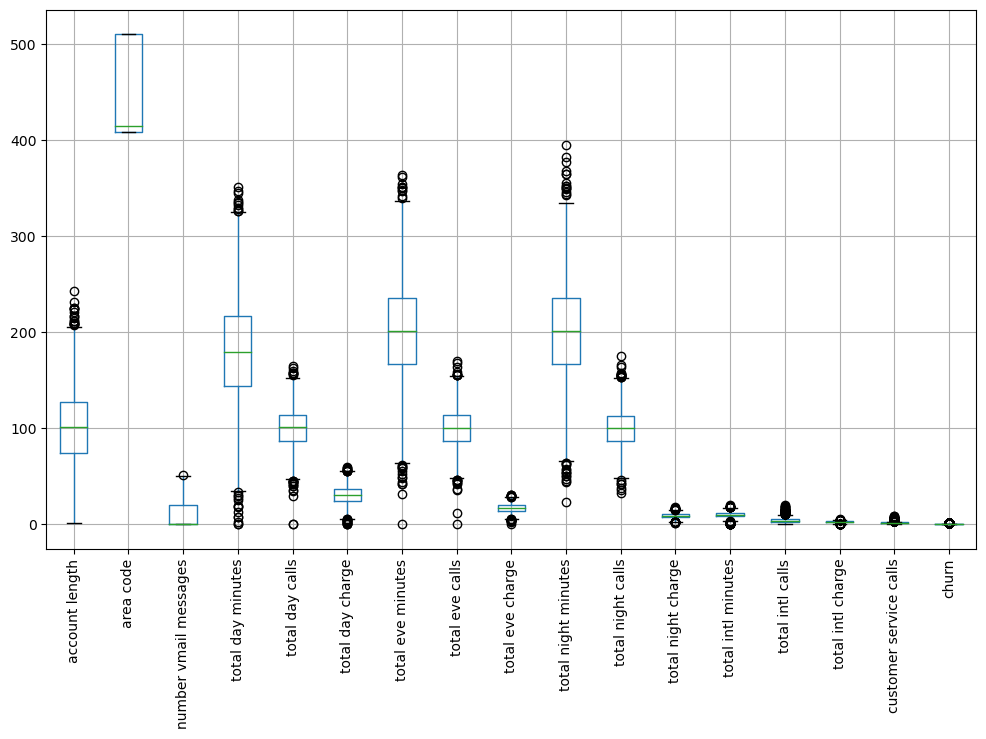

In [12]:
# Detect outliers using box plot
analysis.detect_outliers()

##### 0bservations on outliers
Account Length:  Outliers: Values below the whisker at 50 and above the whisker at 168.5.
Explanation: These represent customers with unusually short or long account durations compared to the majority.

Number Vmail Messages:  Outliers: Values above the whisker at 30.
Explanation: These are customers who have an unusually high number of voicemail messages.

Total Day Minutes:  Outliers: Values above the whisker at 350.
Explanation: These represent customers with unusually high total day minutes.

Total Day Calls:  Outliers: Values below the whisker at 50 and above the whisker at 160.
Explanation: These indicate customers who make significantly fewer or more day calls than the majority.

Total Day Charge:  Outliers: Values above the whisker at 60.
Explanation: These are customers with unusually high day charges, likely due to high usage.

Total Eve Minutes:  Outliers: Values above the whisker at 350.
Explanation: These represent customers with unusually high total evening minutes.

Total Eve Calls:  Outliers: Values below the whisker at 50 and above the whisker at 160.
Explanation: These are customers who make significantly fewer or more evening calls.

Total Eve Charge:  Outliers: Values above the whisker at 30.
Explanation: These indicate customers with unusually high evening charges.

Total Night Minutes:  Outliers: Values above the whisker at 360.
Explanation: These represent customers with unusually high total night minutes.

Total Night Calls:  Outliers: Values below the whisker at 40 and above the whisker at 170.
Explanation: These are customers who make significantly fewer or more night calls.

Total Night Charge:  Outliers: Values above the whisker at 15.
Explanation: These indicate customers with unusually high night charges.

Total Intl Minutes:  Outliers: Values below the whisker at 5 and above the whisker at 20.
Explanation: These represent customers with unusually low or high international minutes.

Total Intl Calls:  Outliers: Values above the whisker at 8.
Explanation: These indicate customers who make an unusually high number of international calls.

Total Intl Charge:  Outliers: Values below the whisker at 1.5 and above the whisker at 5.
Explanation: These are customers with unusually low or high international charges.

Customer Service Calls:  Outliers: Values above the whisker at 5.
Explanation: These represent customers who make an unusually high number of customer service calls.


### 3.7 Handling Outliers

In [13]:
# Cap outliers
analysis.cap_outliers()


Dataset Shape after Capping Outliers: (3333, 21)


#### Observation
##### Capping outliers ( "trimming" ) is a useful preprocessing step that is used to limit the impact of extreme values in your dataset without removing them entirely. This retains all data points thereby preserving the overall structure and size of the dataset. This can lead to more robust and reliable analyses and model training processes.
##### The lower bound is calculated as (Q1 - 1.5)* IQR. The upper bound is calculated as (Q3 + 1.5)*IQR. Any data point below the lower bound is set to the value of the lower bound. Any data point above the upper bound is set to the value of the upper bound.
##### I have opted to cap the outliers instead of removing them because it maintains the integrity and richness of the dataset, reduces potential biases, and enhances model performance without the loss of valuable information.

#### 3.8 Confirmation and visualization of capped outliers

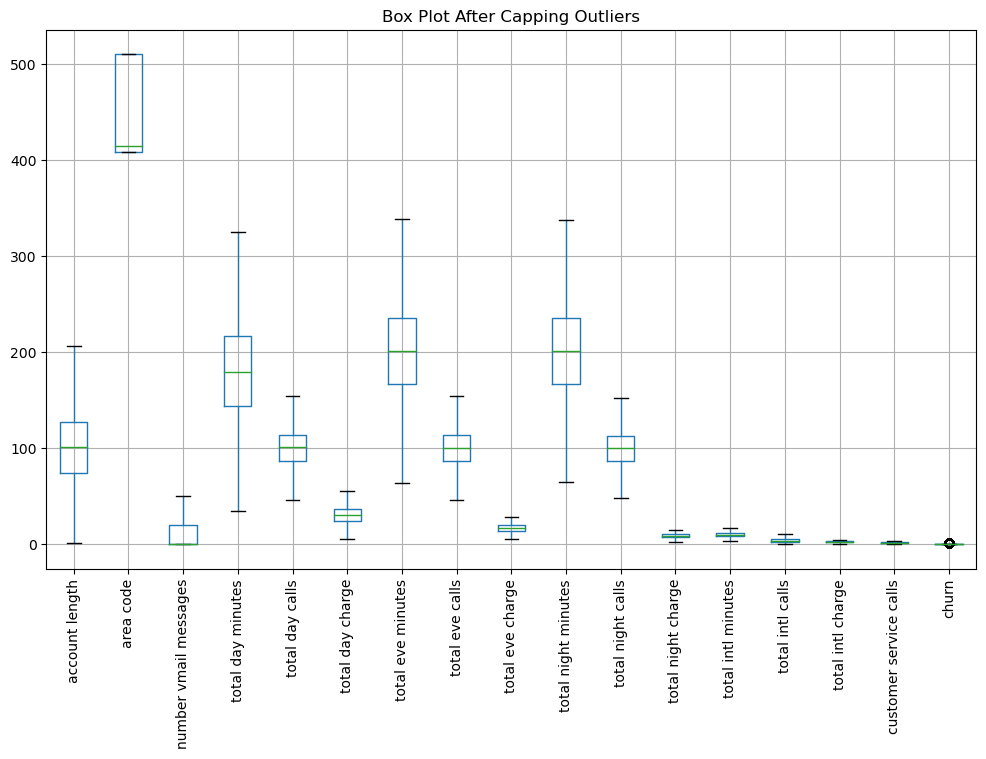

In [14]:
# Function to cap outliers
def cap_outliers(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Function to plot box plots for numerical features
def plot_boxplots(df, title):
    plt.figure(figsize=(12, 7))
    df.boxplot(rot=90)
    plt.title(title)
    plt.show()

# Cap the outliers
df_capped = cap_outliers(df.copy())  

# Plot box plots after capping
plot_boxplots(df_capped, 'Box Plot After Capping Outliers')

#### Observation
##### Capping outliers has resulted in a more contained and balanced dataset.Extreme values have been capped, reducing the spread of the data. The box plot shows a tighter range now. The whiskers on the box plots now reflect a reasonable range for each feature, making the dataset more robust for further analysis. This method helps in preserving the overall structure and trends in the data while mitigating the effect of extreme values. This can lead to more stable and reliable results in subsequent analyses and modeling efforts.

In [15]:
# Function to detect outliers using IQR method
def detect_outliers(df):
    outliers = {}
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    return outliers

print("Outliers After Capping:\n", detect_outliers(df_capped))


Outliers After Capping:
 {'account length': 0, 'area code': 0, 'number vmail messages': 0, 'total day minutes': 0, 'total day calls': 0, 'total day charge': 0, 'total eve minutes': 0, 'total eve calls': 0, 'total eve charge': 0, 'total night minutes': 0, 'total night calls': 0, 'total night charge': 0, 'total intl minutes': 0, 'total intl calls': 0, 'total intl charge': 0, 'customer service calls': 0}


In [16]:
# Final check
analysis.final_dataset_info()


Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   float64
 2   area code               3333 non-null   float64
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   float64
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   float64
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   float64
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls  

#### The final dataset after cleaning shows that:
Data Integrity:

The non-null count being 3333 for all columns indicates that the dataset does not have any missing values.

Data Types:

The dataset contains a mix of numerical (float64), categorical (object), and boolean (bool) data types.
This is useful for knowing which columns may require encoding or other preprocessing steps before feeding the data into a machine learning model.

Churn Column:

The churn column is a boolean type, which is typical for a binary classification problem where the goal might be to predict whether a customer will churn (True) or not (False).

## 4. Exploratory Data Analysis

### 4.0 Univariate Analysis

#### Numeric Features

Descriptive Statistics:
Mean, median, mode, standard deviation, and range are calculated for each numeric feature and printed.

Visualizations:
Histograms: Show the frequency distribution of numeric features.
Box Plots: Highlight the distribution and potential outliers of numeric features.
Density Plots: Provide a smoothed representation of the distribution of numeric features.

In [17]:

# Separate numeric and categorical features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=[object, 'bool']).columns.tolist()


def univariate_numeric(df, numeric_features):
    plt.figure(figsize=(20, 35))
    plt.suptitle('Univariate Analysis for Numeric Features', fontsize=20)
    
    for i, feature in enumerate(numeric_features, 1):
        plt.subplot(len(numeric_features), 3, 3*i-2)
        sns.histplot(df[feature], kde=True)
        plt.title(f"Histogram of {feature}")
        
        plt.subplot(len(numeric_features), 3, 3*i-1)
        sns.boxplot(x=df[feature])
        plt.title(f"Box Plot of {feature}")
        
        plt.subplot(len(numeric_features), 3, 3*i)
        sns.kdeplot(df[feature], fill=True)
        plt.title(f"Density Plot of {feature}")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    for feature in numeric_features:
        print(f"Feature: {feature}")
        print(f"Mean: {df[feature].mean()}")
        print(f"Median: {df[feature].median()}")
        print(f"Mode: {df[feature].mode().values}")
        print(f"Standard Deviation: {df[feature].std()}")
        print(f"Range: {df[feature].max() - df[feature].min()}")
        print("\n")



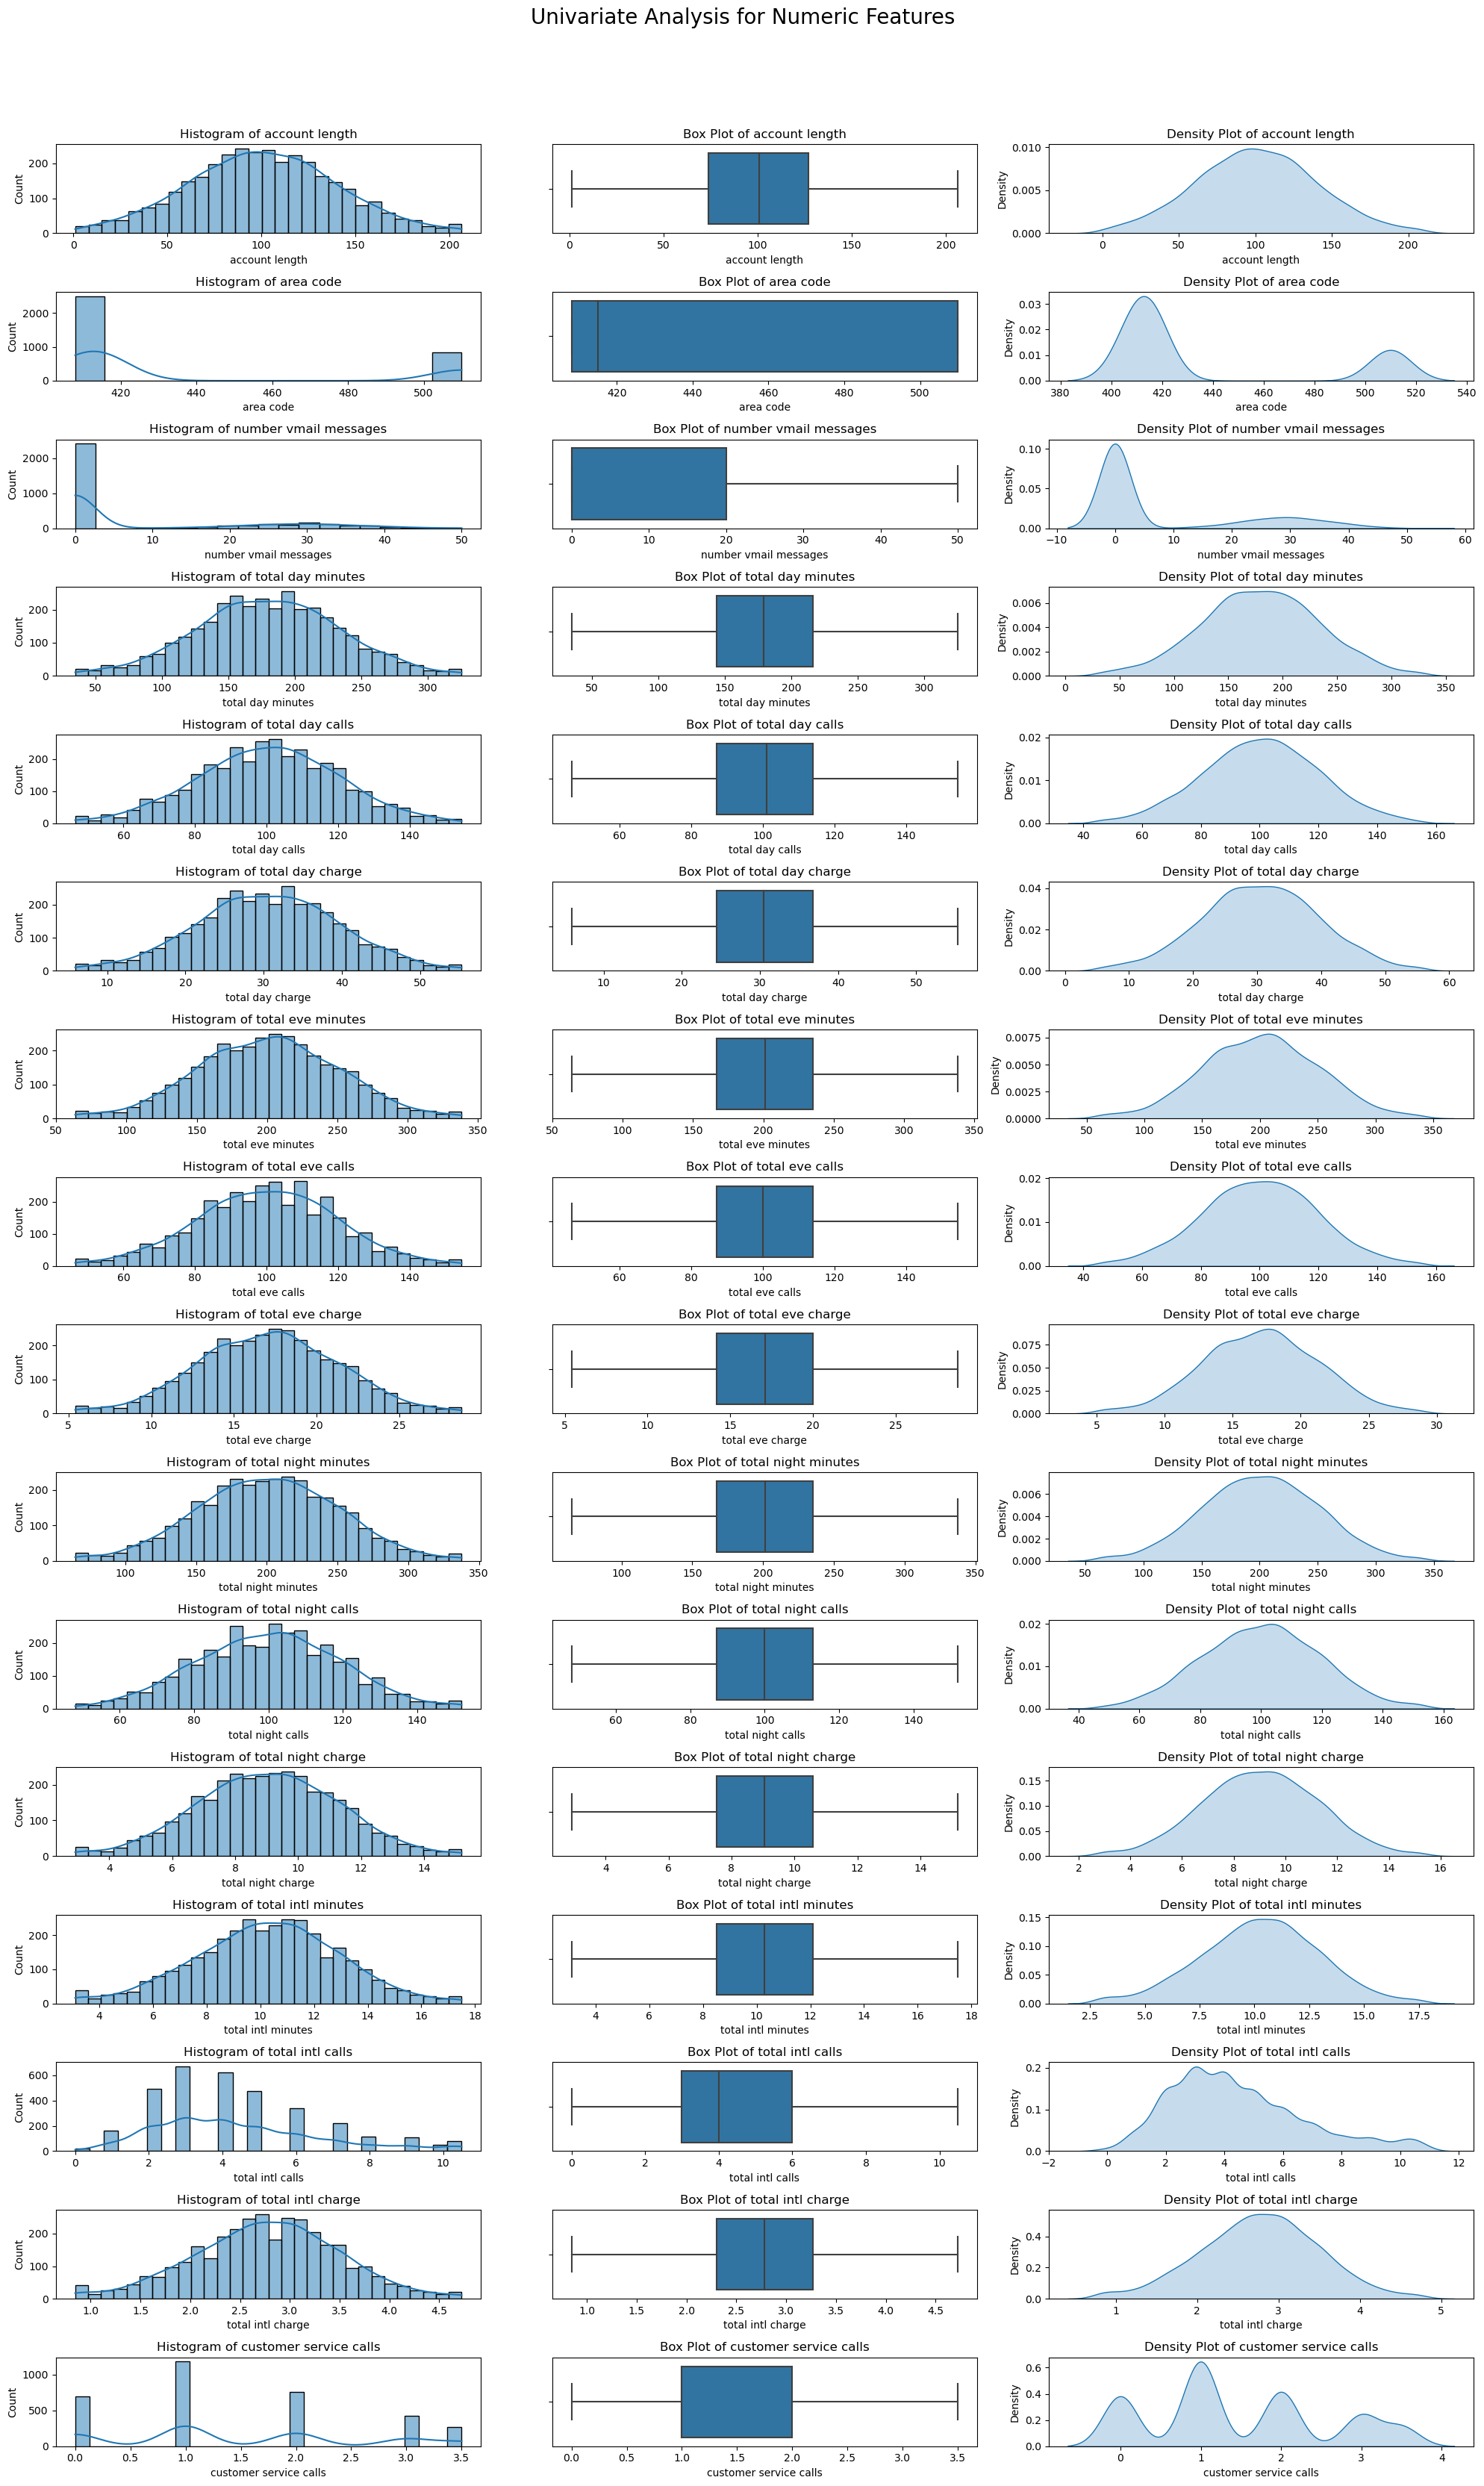

Feature: account length
Mean: 101.003300330033
Median: 101.0
Mode: [105.]
Standard Deviation: 39.6441118118372
Range: 205.5


Feature: area code
Mean: 437.18241824182417
Median: 415.0
Mode: [415.]
Standard Deviation: 42.371290485606224
Range: 102.0


Feature: number vmail messages
Mean: 8.098709870987099
Median: 0.0
Mode: [0.]
Standard Deviation: 13.687435687301353
Range: 50.0


Feature: total day minutes
Mean: 179.81615661566155
Median: 179.4
Mode: [34.65]
Standard Deviation: 54.15218953645832
Range: 290.80000000000007


Feature: total day calls
Mean: 100.47359735973598
Median: 101.0
Mode: [102.]
Standard Deviation: 19.86374033867726
Range: 108.0


Feature: total day charge
Mean: 30.56929192919292
Median: 30.5
Mode: [5.89]
Standard Deviation: 9.205864569701006
Range: 49.44


Feature: total eve minutes
Mean: 201.0095409540954
Median: 201.4
Mode: [63.55]
Standard Deviation: 50.40136521985993
Range: 274.80000000000007


Feature: total eve calls
Mean: 100.13411341134113
Median: 100.0
Mode

In [18]:
univariate_numeric(df, numeric_features)

#### Conclusion from the visualizations
#### The univariate analysis of numeric features includes histograms, box plots, and density plots to comprehensively understand data distribution and characteristics. Histograms reveal frequency distributions, with most features showing normal distributions. For instance, total day minutes and total day calls display bell curves, indicating normality, while the number of voicemail messages peaks sharply at zero, suggesting most users don't use this feature. Box plots summarize statistical properties, highlighting medians, quartiles, and outliers. Features like account length show symmetrical distributions with mild outliers, whereas customer service calls exhibit a higher concentration of lower values with some outliers. Density plots, estimating probability density functions, further confirm normal distributions for features like total day minutes and total eve minutes, while area code displays categorical-like behavior with distinct peaks. Overall, these visualizations provide a detailed statistical summary and distributional insight, essential for identifying patterns, potential anomalies, and informing subsequent data analysis or modeling efforts.

#### Conclusion from the descriptive statistics 
#### In the univariate analysis of numerical features, we find that account lengths exhibit a relatively symmetrical distribution with a mean of approximately 101 days. Area codes display potential skewness, with a mean of 437.18 and a median of 415.0. Most customers don't use voicemail, as indicated by a right-skewed distribution with a mean of 8.10 messages and a median of 0.0. These insights provide a foundational understanding of the data's distribution and variability, essential for further analysis in customer churn prediction.

#### Categorical Features

Frequency Tables:
Count the occurrences of each category for categorical features.

Visualizations:
Bar Plots: Display the frequency of each category in categorical features.
Pie Charts: Represent the proportion of each category in categorical features.

In [19]:


# Univariate Analysis for Categorical Features
def univariate_categorical(df, categorical_features):
    plt.figure(figsize=(20, 15))
    plt.suptitle('Univariate Analysis for Categorical Features', fontsize=20)
    
    for i, feature in enumerate(categorical_features, 1):
        plt.subplot(len(categorical_features), 2, 2*i-1)
        sns.countplot(x=df[feature])
        plt.title(f"Bar Plot of {feature}")
        
        plt.subplot(len(categorical_features), 2, 2*i)
        df[feature].value_counts().plot.pie(autopct="%1.1f%%", startangle=90)
        plt.title(f"Pie Chart of {feature}")
        plt.ylabel('')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    for feature in categorical_features:
        print(f"Feature: {feature}")
        print(df[feature].value_counts())
        print("\n")



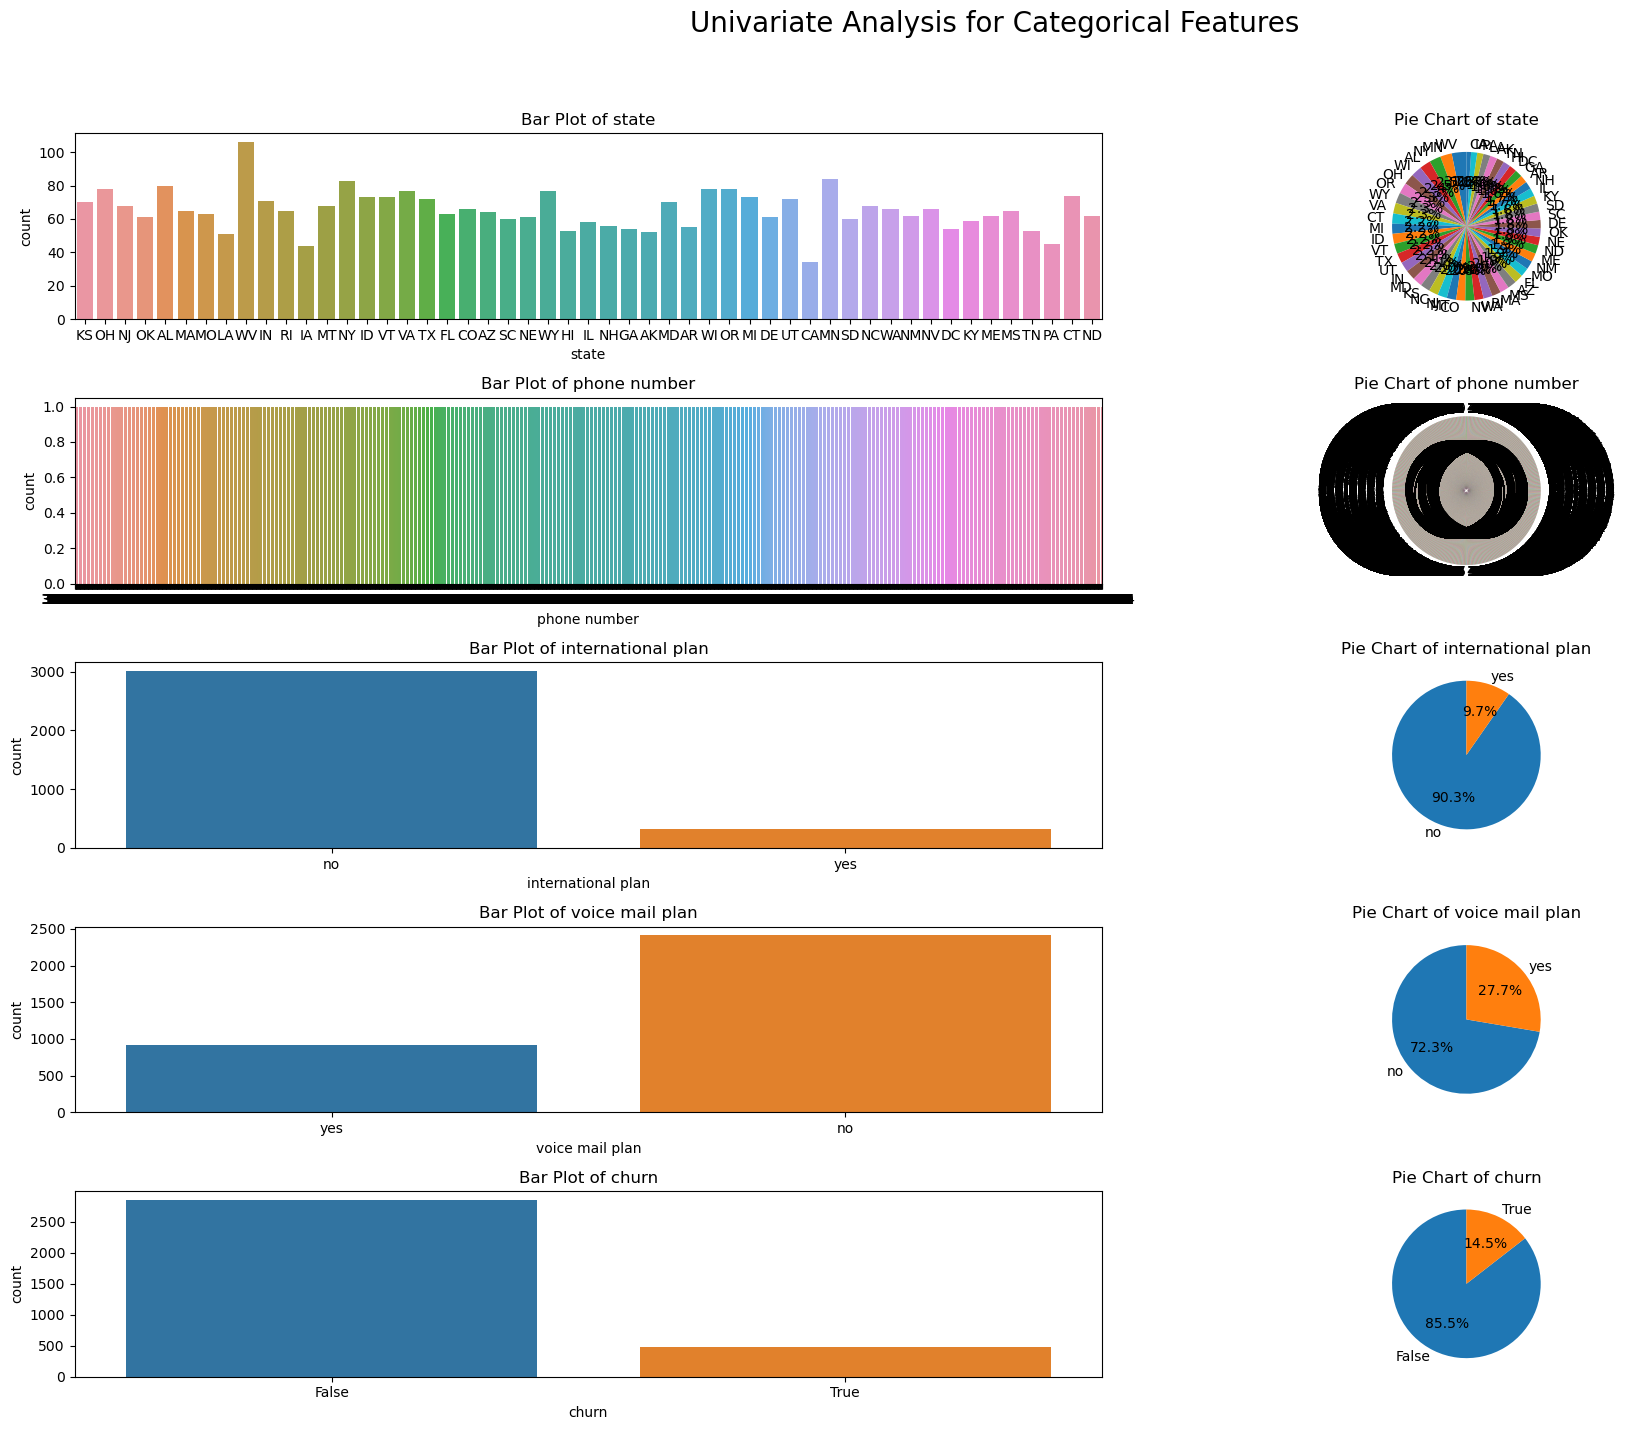

Feature: state
state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64


Feature: phone number
phone number
382-4657    1
348-7071    1
389-6082    1
415-3689    1
379-2503    1
           ..
352-1127    1
368-1288    1
403-5279    1
397-9333    1
400-4344    1
Name: count, Length: 3333, dtype: int64


Feature: international plan
international plan
no     3010
yes     323
Name: count, dtype: int64


Feature: voice mail plan
voice mail plan
no     2411
yes     922
Name: count, dtype: int64


Feature: churn
chu

In [20]:
univariate_categorical(df, categorical_features)


#### Observation from the visualization of categorical values
State: The bar plot shows the distribution of data across various states. The counts are relatively uniform, indicating a fairly even distribution of the dataset across different states. The corresponding pie chart visually represents the same information, in a more compact form.

Phone Number: The bar plot for phone numbers indicates that each phone number is unique, as each bar has a count of one. The pie chart reaffirms this, displaying an equal distribution among all phone numbers.

International Plan: The bar plot reveals that the vast majority of users do not have an international plan, with a significant skew towards 'no'. This is confirmed by the pie chart, which shows that 90.3% of users do not have an international plan, while only 9.7% do.

Voice Mail Plan: In contrast to the international plan, the bar plot for the voice mail plan indicates a majority of users do not have this plan, but the distribution is less skewed compared to the international plan. The pie chart illustrates that 72.3% of users do not have a voice mail plan, while 27.7% do.

Churn: The churn bar plot shows that a smaller proportion of users have churned compared to those who have not. Specifically, the pie chart indicates that 14.5% of users have churned, whereas 85.5% have not.



### 4.1 Bivariate Analysis

#### a) Numeric vs. Numeric:

Scatter Plots: To identify relationships between pairs of numeric variables.

Correlation Matrix and Heatmap: To examine correlations between numeric variables.

In [39]:
# Select important features
important_numeric_features = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']
important_categorical_features = ['churn', 'international_plan']

# Bivariate Analysis for Numeric vs Numeric
def bivariate_numeric_numeric(df, numeric_features):
    for i in range(len(numeric_features)):
        for j in range(i + 1, len(numeric_features)):
            feature_x = numeric_features[i]
            feature_y = numeric_features[j]

            print(f"Bivariate Analysis between {feature_x} and {feature_y}")

            # Scatter Plot
            plt.figure(figsize=(14, 6))
            sns.scatterplot(x=feature_x, y=feature_y, data=df)
            plt.title(f"Scatter Plot between {feature_x} and {feature_y}")
            plt.xlabel(feature_x)
            plt.ylabel(feature_y)
            plt.show()

Bivariate Analysis between total day minutes and total eve minutes


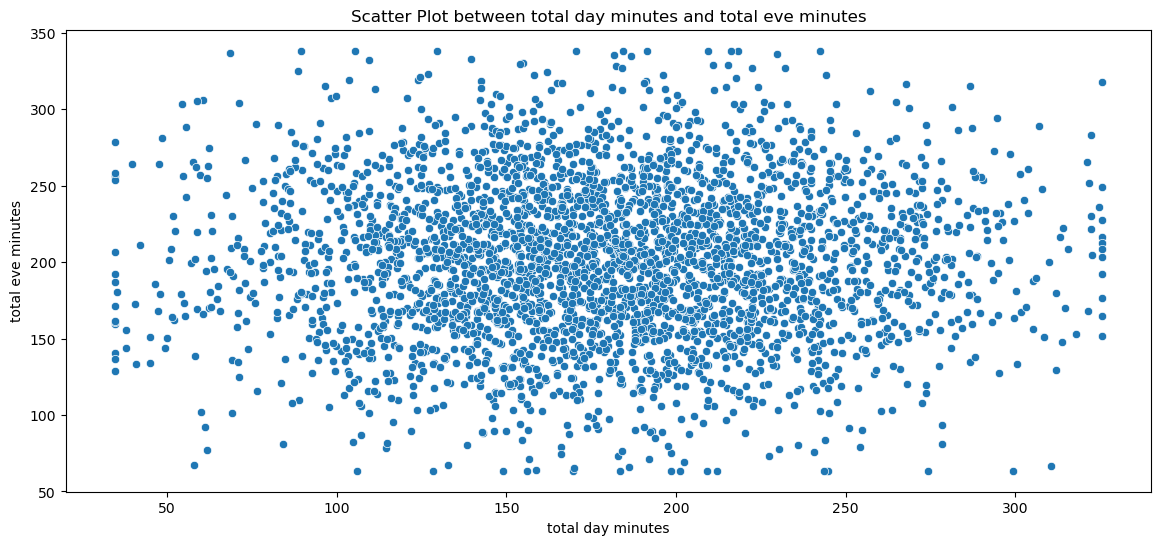

Bivariate Analysis between total day minutes and total night minutes


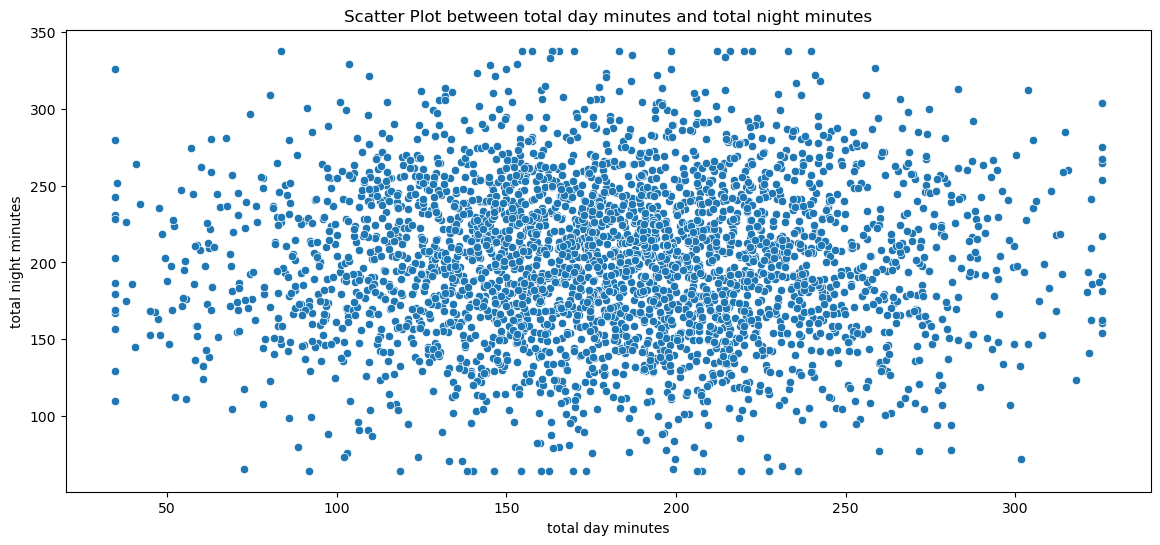

Bivariate Analysis between total day minutes and total intl minutes


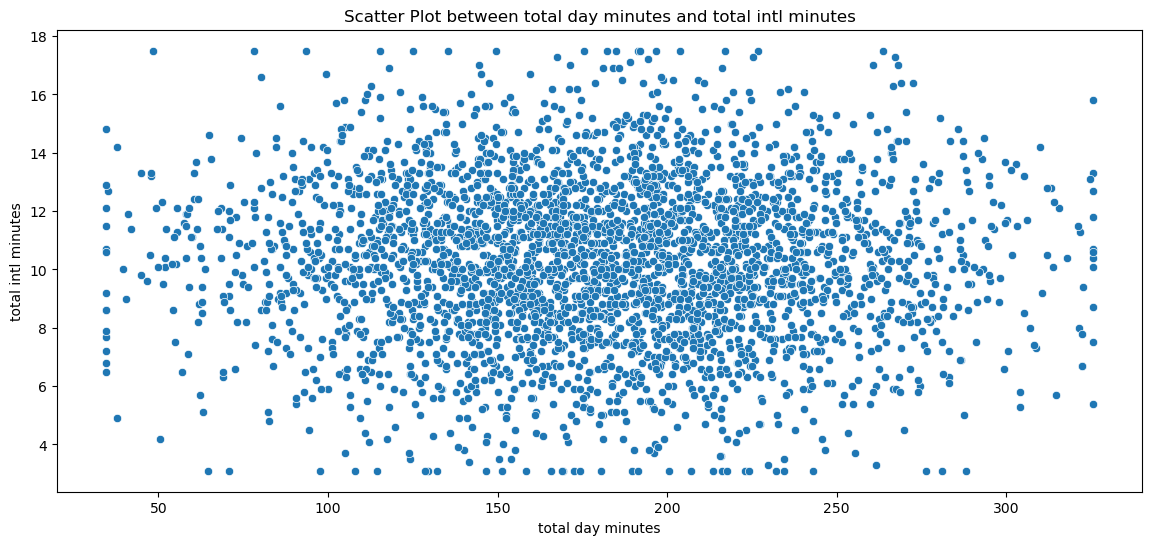

Bivariate Analysis between total eve minutes and total night minutes


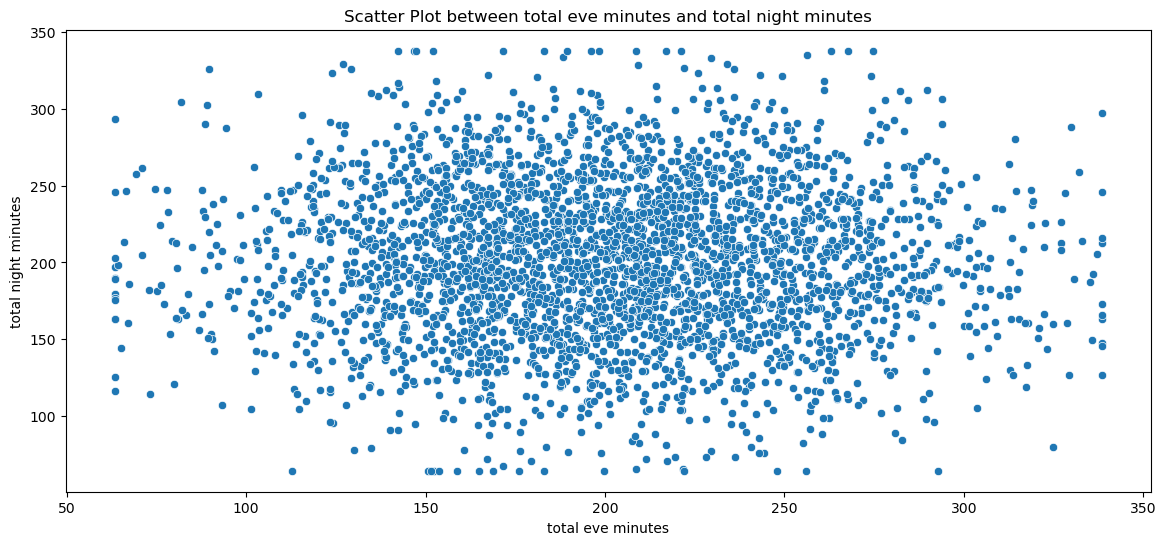

Bivariate Analysis between total eve minutes and total intl minutes


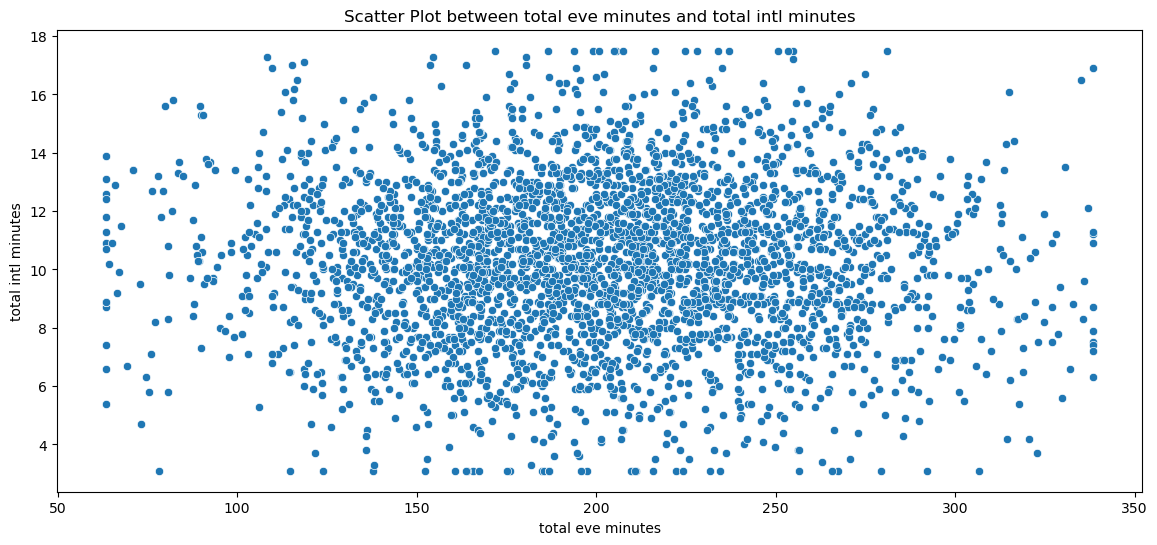

Bivariate Analysis between total night minutes and total intl minutes


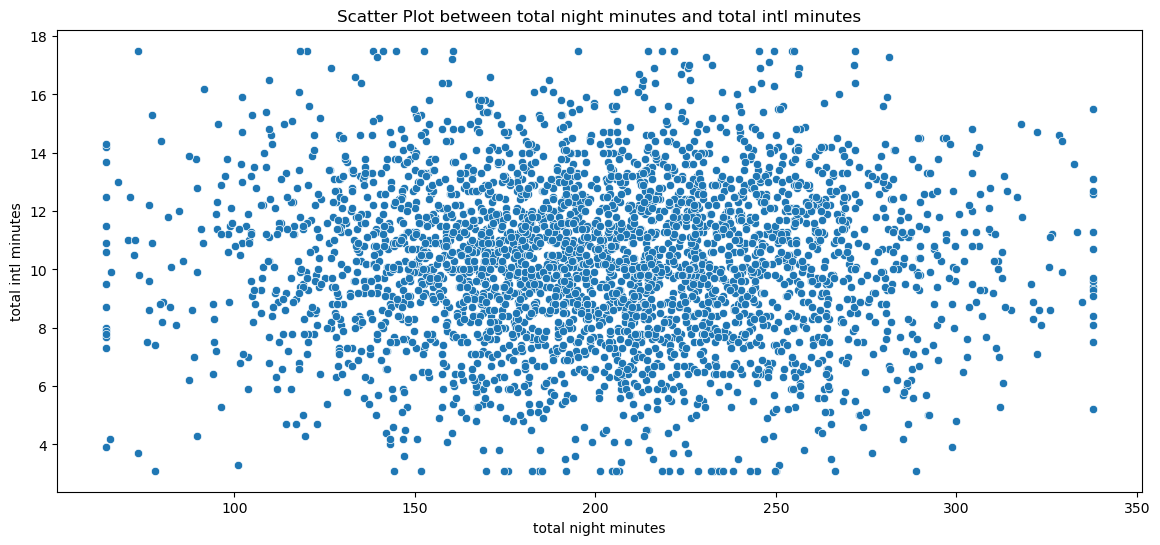

In [40]:
bivariate_numeric_numeric(df, important_numeric_features)

In [35]:
# Separate numeric and categorical features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=[object, 'bool']).columns.tolist()

# Bivariate Analysis for Numeric vs Numeric
def bivariate_numeric_numeric(df, numeric_features):
    

    # Correlation Matrix and Heatmap
    corr_matrix = df[numeric_features].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("Correlation Matrix Heatmap")
    plt.show()


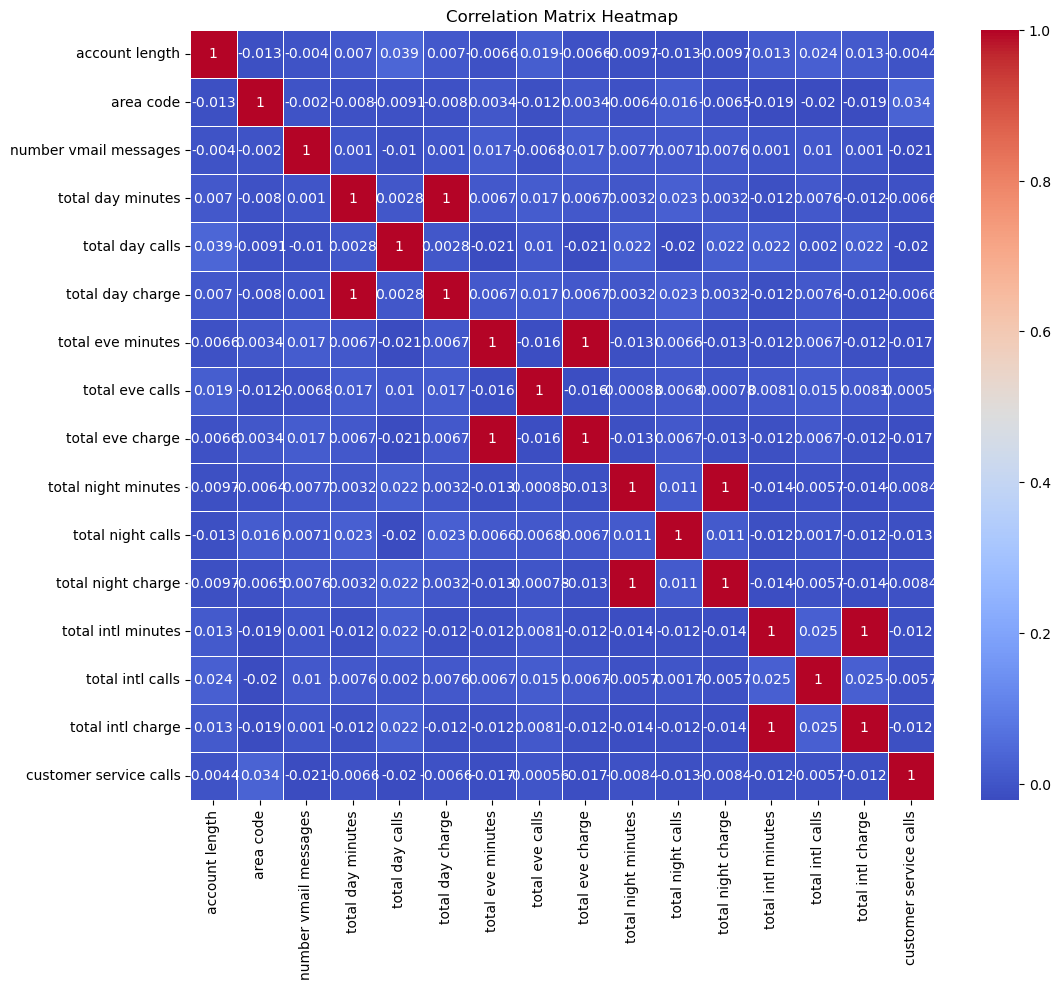

In [36]:

bivariate_numeric_numeric(df, numeric_features)

#### Insights
#### High Positive Correlations: 
 Minutes and Charges: There are perfect positive correlations (correlation coefficient of 1) between the total minutes used and the corresponding charges for day, evening, and night periods. This suggests that as the number of minutes increases, the charges also increase proportionally for these periods.

 Call Counts: There are perfect correlations between the call counts and their respective minutes and charges for day, evening, and night periods.

#### Moderate Positive Correlations:
Features such as total evening minutes and total evening calls show a moderate positive correlation (0.16), indicating a positive but not perfect linear relationship.

#### Low or No Correlations:
Area code and number of voicemail messages generally show low or negligible correlations with most other features, indicating little to no linear relationship.
Customer service calls have low correlations with other features, suggesting they do not strongly co-vary with the usage metrics.


#### b)Categorical vs Numeric

In [50]:
# Select important features
important_numeric_features = ['customer service calls', 'account length']
important_categorical_features = ['churn', 'state']

# Bivariate Analysis for Categorical vs Numeric
def bivariate_categorical_numeric(df, categorical_features, numeric_features):
    for cat_feature in categorical_features:
        for num_feature in numeric_features:
            print(f"Bivariate Analysis between {cat_feature} and {num_feature}")

            # Box Plot
            plt.figure(figsize=(14, 6))
            sns.boxplot(x=cat_feature, y=num_feature, data=df)
            plt.title(f"Box Plot of {num_feature} across {cat_feature}")
            plt.show()


Bivariate Analysis between churn and customer service calls


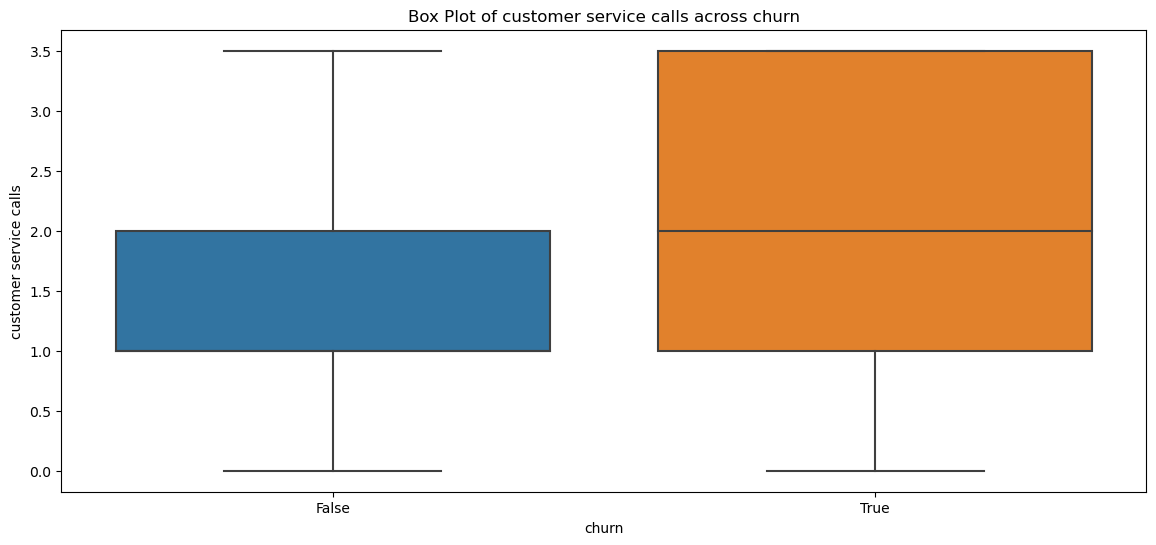

Bivariate Analysis between churn and account length


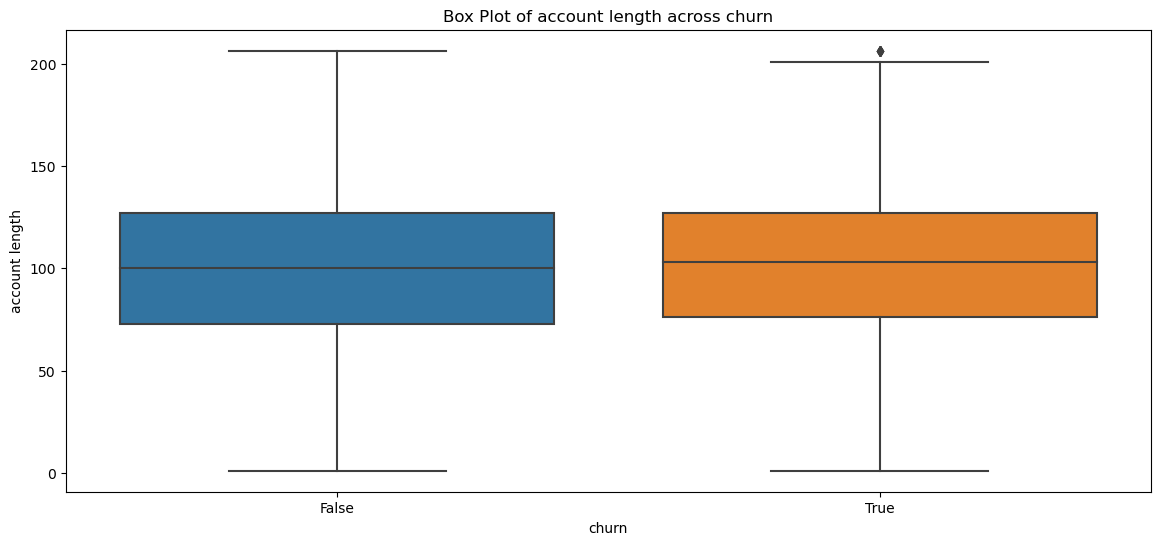

Bivariate Analysis between state and customer service calls


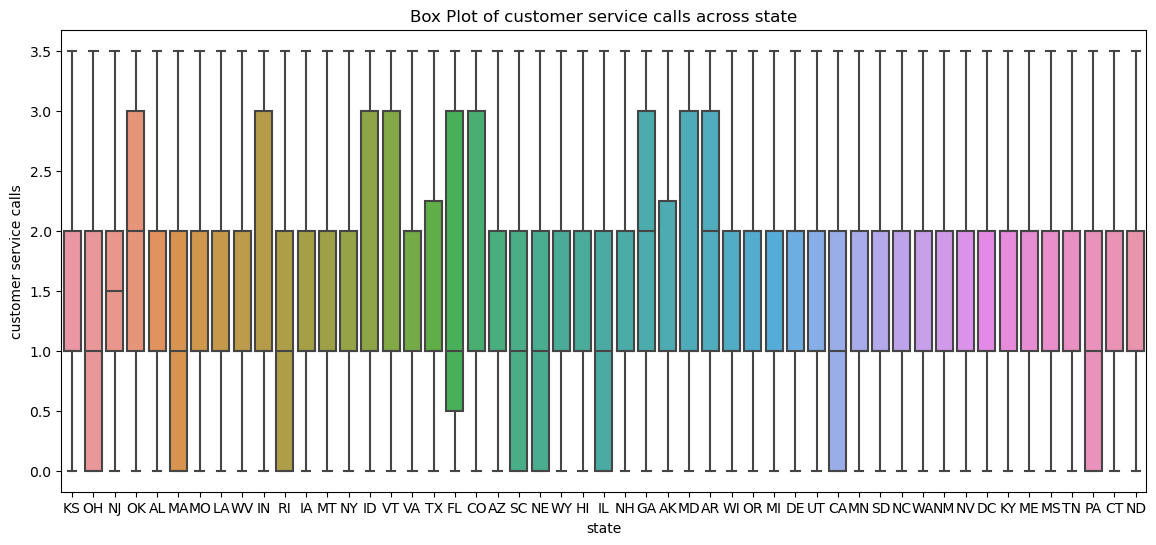

Bivariate Analysis between state and account length


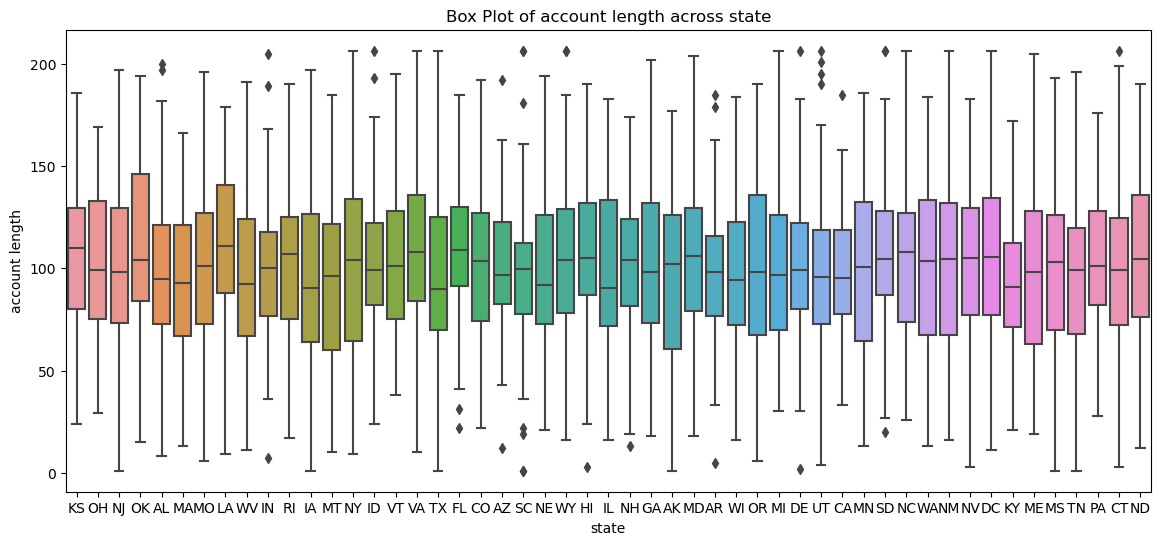

In [51]:
bivariate_categorical_numeric(df, important_categorical_features, important_numeric_features)